<a href="https://colab.research.google.com/github/ucfilho/AI/blob/main/AI_2023/Fuzzy_System/fundamentals_fuzzy_logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Antecedents and consequent

In [3]:
np.arange(0, 6, 1)

array([0, 1, 2, 3, 4, 5])

In [4]:
x = ctrl.Antecedent(np.arange(0, 11, 1), 'x')
y= ctrl.Antecedent(np.arange(0, 11, 1), 'y')

In [5]:
x.universe, y.universe

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

In [6]:
z = ctrl.Consequent(np.arange(0, 11, 1), 'z')

In [7]:
z.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## Membership functions

In [8]:
x.automf(number = 3, names = ['easy', 'moderate', 'hard'])
y.automf(number = 3, names = ['light', 'moderate', 'heavy'])

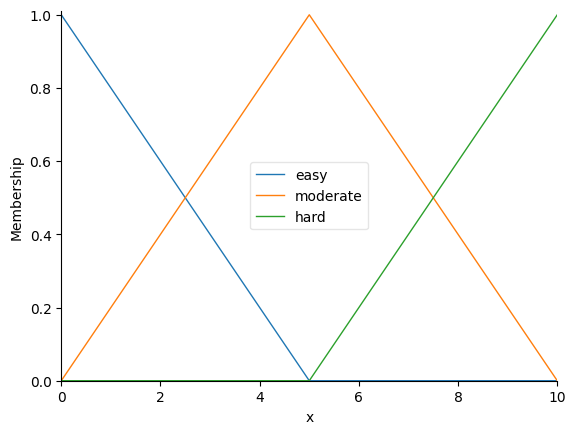

In [9]:
x.view()

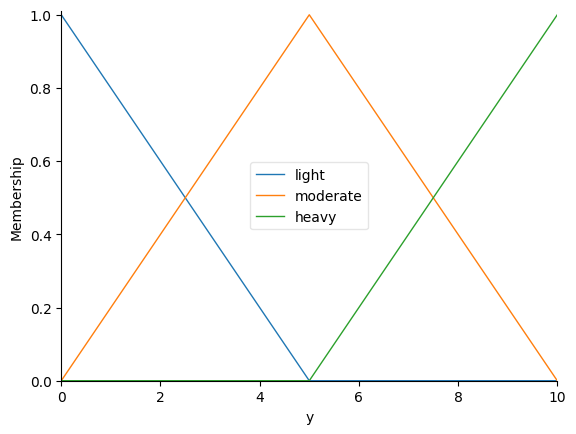

In [10]:
y.view()

In [11]:
z.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

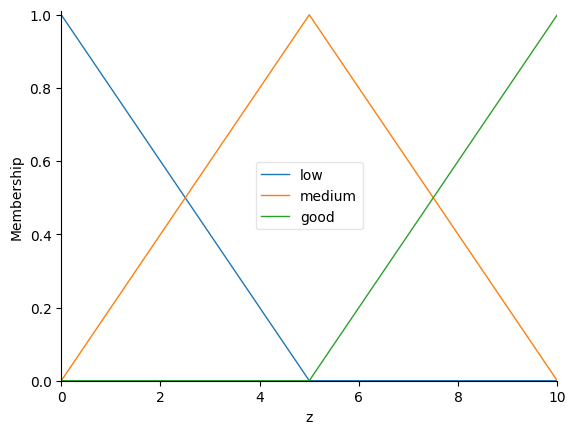

In [12]:
z['low'] = fuzz.trimf(z.universe, [0, 0, 5])
z['medium'] = fuzz.trimf(z.universe, [0, 5, 10])
z['good'] = fuzz.trimf(z.universe, [5, 10, 10])
z.view()

In [13]:
r1 =ctrl.Rule(x['easy']|y['light'],z['good'])
r2 =ctrl.Rule(x['easy']|y['moderate'],z['good'])
r3 =ctrl.Rule(x['easy']|y['heavy'],z['medium'])
r4 =ctrl.Rule(x['moderate']|y['light'],z['good'])
r5 =ctrl.Rule(x['moderate']|y['moderate'],z['medium'])
r6 =ctrl.Rule(x['moderate']|y['heavy'],z['low'])
r7 =ctrl.Rule(x['hard']|y['light'],z['medium'])
r8 =ctrl.Rule(x['hard']|y['moderate'],z['low'])
r9 =ctrl.Rule(x['hard']|y['heavy'],z['low'])


In [14]:
z_model = ctrl.ControlSystem([r1,r2,r3,r4,r5,r6,r7,r8,r9])
z_simulador = ctrl.ControlSystemSimulation(z_model)

In [15]:
# Entrando   valores para avaliar o modelo
z_simulador.input['x'] = 3.5
z_simulador.input['y'] = 9.4

# Computando o resultado
z_simulador.compute()
print(z_simulador.output['z'])

4.884450254575478


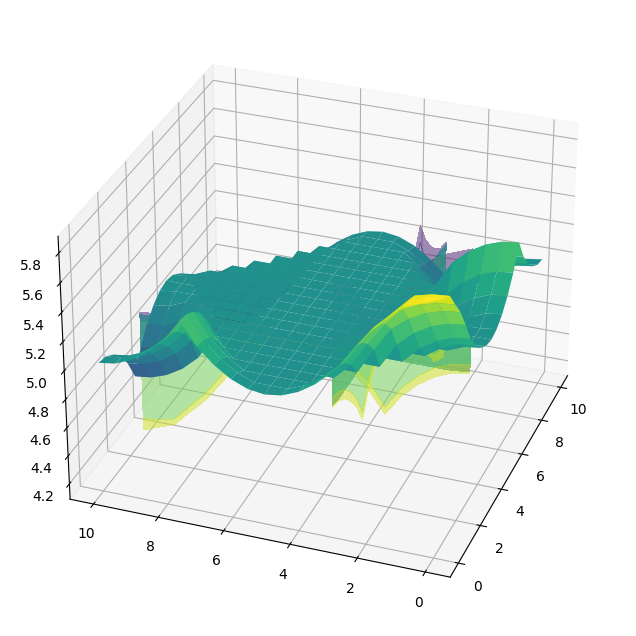

In [16]:
# We can simulate at higher resolution with full accuracy
upsampled = np.linspace(0, 10, 21)
xx, yy = np.meshgrid(upsampled, upsampled)
zz = np.zeros_like(xx)

# Loop through the system 21*21 times to collect the control surface
for i in range(21):
    for j in range(21):
        z_simulador.input['x'] = xx[i, j]
        z_simulador.input['y'] = yy[i, j]
        z_simulador.compute()
        zz[i, j] = z_simulador.output['z']

# Plot the result in pretty 3D with alpha blending
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)

cset = ax.contourf(xx, yy, zz, zdir='z', offset=-2.5, cmap='viridis', alpha=0.5)
cset = ax.contourf(xx, yy, zz, zdir='x', offset=3, cmap='viridis', alpha=0.5)
cset = ax.contourf(xx, yy, zz, zdir='y', offset=3, cmap='viridis', alpha=0.5)

ax.view_init(30, 200)